In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('Solarize_Light2')
import seaborn as sns
from datetime import datetime as dat, timedelta
from pandas import datetime
from dateutil.relativedelta import relativedelta
import statsmodels as sm
import statsmodels.api as sm  
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
def timeseries_conversion(path,datecol):
    df = pd.read_csv(path)
    #df.drop('State',axis=1,inplace=True)
    #df1 = df[[datecol,targcol]]
    df.dropna(how='all',inplace = True)
    df[datecol]= pd.to_datetime(df[datecol])
    #df1[targcol] = df1[targcol].astype(float)
    df = df.sort_values(by=datecol)
    weeknum = df[datecol].dt.dayofweek
    df=df.set_index(datecol)
    #df=df.astype(float)
    return df,weeknum
path='/home/rupeshr/Desktop/india_covid.csv'
datecol='date'
#targcol='Temp'
df1,weeknum=timeseries_conversion(path,datecol)

In [3]:
df1.head()

,iso_code,continent,Country,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,
2020-05-18,IND,Asia,India,100328,4630,3156,131,72.701,3.355,2.287,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
2020-05-19,IND,Asia,India,106475,6147,3302,146,77.156,4.454,2.393,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
2020-05-20,IND,Asia,India,112028,5553,3434,132,81.179,4.024,2.488,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
2020-05-21,IND,Asia,India,118226,6198,3584,150,85.671,4.491,2.597,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
2020-05-22,IND,Asia,India,124794,6568,3726,142,90.430,4.759,2.700,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [4]:
freq = pd.infer_freq(df1.index)
print(freq)

D


In [7]:
df1=df1.loc[df1['out_or_in'] == 'In'] 
df1.shape

(20345, 4)

In [4]:
df1.drop(['Unnamed: 3','Unnamed: 4','id'], axis=1,inplace=True)

In [15]:
df1.drop(['out_or_in'], axis=1,inplace=True)

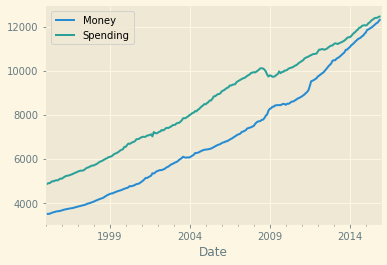

In [5]:
df1.plot()

In [15]:
df1.reset_index(inplace=True)
df1.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-02-08 13:30:47,0.206030,0.277924,1.81019,0.382638,90.1740,26.7760,228.208,121.664,NaN,NaN
1,2020-02-08 13:30:48,0.204366,0.275727,2.66317,-0.273216,90.2836,26.7760,227.245,122.000,NaN,NaN
2,2020-02-08 13:30:49,0.206103,0.278526,2.63758,0.382638,89.8666,26.7821,237.872,122.000,NaN,NaN
3,2020-02-08 13:30:51,0.204775,0.276948,2.32851,0.382638,90.2192,26.7773,230.422,121.338,NaN,NaN
4,2020-02-08 13:30:52,0.206052,0.278141,2.53422,0.382638,90.1449,26.7773,219.454,121.664,NaN,NaN


In [14]:
df1.drop('index',axis=1, inplace=True)
df1.head()

,DateTime,Vehicles
0,2015-11-01 00:00:00,15
1,2015-11-01 00:00:00,6
2,2015-11-01 00:00:00,9
3,2015-11-01 01:00:00,7
4,2015-11-01 01:00:00,13


In [15]:
df1.shape
df1=df1.set_index('DateTime').asfreq('H')
df1.shape

ValueError: cannot reindex from a duplicate axis

In [53]:
# print(df1['Monthly beer production'])

# print(df1['Monthly beer production'].shift(1, freq='Q'))

s=df1['Money'] - df1['Money'].shift(1)
print(s)

Date
1995-01-01     NaN
1995-02-01    -2.5
1995-03-01     1.2
1995-04-01     8.1
1995-05-01    25.0
              ... 
2015-08-01    51.5
2015-09-01    57.0
2015-10-01    33.9
2015-11-01    89.7
2015-12-01    58.5
Name: Money, Length: 252, dtype: float64


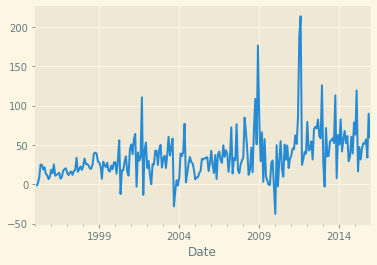

In [48]:
s.plot()

In [54]:
c=s-s.shift(1)
print(c)

Date
1995-01-01     NaN
1995-02-01     NaN
1995-03-01     3.7
1995-04-01     6.9
1995-05-01    16.9
              ... 
2015-08-01    -0.7
2015-09-01     5.5
2015-10-01   -23.1
2015-11-01    55.8
2015-12-01   -31.2
Name: Money, Length: 252, dtype: float64


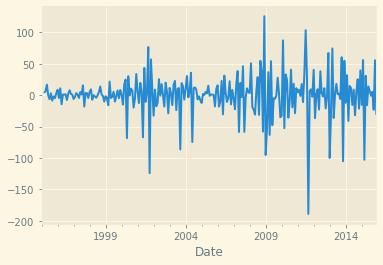

In [45]:
c.plot()

In [15]:
s=df1['Money'].diff(3)
print(s)

Date
1995-01-01      NaN
1995-02-01      NaN
1995-03-01      NaN
1995-04-01      6.8
1995-05-01     34.3
              ...  
2015-08-01    149.2
2015-09-01    160.7
2015-10-01    142.4
2015-11-01    180.6
2015-12-01    182.1
Name: Money, Length: 252, dtype: float64


In [16]:
# data slicing 
def slicing(df1,st,en):
    df1=df1[st:en]
    return df1
st='20000101000000'
en='20100101000000'
df1=slicing(df1,st,en)

In [17]:
df1.head()

,Sunspots
Month,
2000-01-01,84.6
2000-02-01,90.1
2000-03-01,112.9
2000-04-01,138.5
2000-05-01,125.5


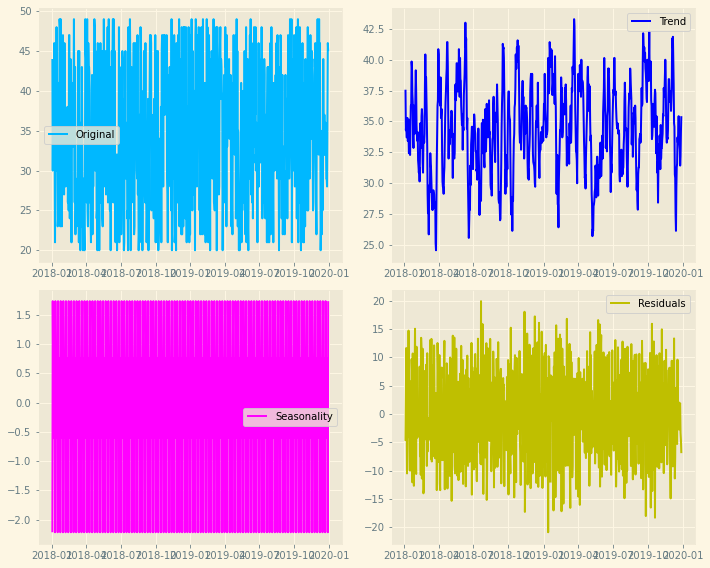

In [6]:
import statsmodels.api as sm  
def seasonal_decompose(df1):
    decomposition = sm.tsa.seasonal_decompose(df1, model = 'additive')
    plt.figure(figsize=(10, 8))
    trend = decomposition.trend
    #trend.plot()
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.subplot(221)
    plt.plot(df1, color='#00b8ff', label='Original')
    plt.legend(loc='best')
    plt.subplot(222)
    plt.plot(trend, 'b', label='Trend')
    plt.legend(loc='best')

    plt.subplot(223)
    plt.plot(seasonal, color='#ff00ff', label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(224)
    plt.plot(residual, 'y', label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return
seasonal_decompose(df1)

In [7]:
def resamplingtechnique(df1,weeknum,resamplemethod,resampletype,frequencytype,imputation):
    weekday1= weeknum[len(weeknum)-1]
    def weekdays(weekday1):
        if weekday1 == 0:
            day = 'W-MON'
        elif weekday1 == 1:
            day = 'W-TUE'
        elif weekday1 == 2:
            day = 'W-WED'
        elif weekday1 == 3:
            day = 'W-THU'
        elif weekday1 == 4:
            day = 'W-FRI'
        elif weekday1 == 5:
            day = 'W-SAT'
        elif weekday1 == 6:
            day = 'W-SUN'
        return day
    #valueddata = adfuller_test(df1)
    if resamplemethod == 'no':
        pass
    elif resamplemethod =='upsample':
        if resampletype =='no':
            pass
        elif resampletype =='linear':
            second=df1.resample('S').interpolate(method='linear')
            minute=df1.resample('T').interpolate(method='linear')
            hourly = df1.resample('H').interpolate(method='linear') # two columns( one date column and one target column) as the base data frame.
            daily = df1.resample('D').interpolate(method='linear')
            weekly = df1.resample(weekdays(weekday1)).interpolate(method='linear')
            monthly = df1.resample('M').interpolate(method='linear')
            quarterly = df1.resample('Q').interpolate(method='linear')
            yearly =df1.resample('Y').interpolate(method='linear')

        elif resampletype == 'spline':
            seconds=df1.resample('S').interpolate(method='spline',order=2)
            minutes=df1.resample('T').interpolate(method='spline',order=2)
            hourly = df1.resample('H').interpolate(method='spline',order=2)  # two columns( one date column and one target column) as the base data frame.
            daily = df1.resample('D').interpolate(method='spline', order=2)
            weekly = df1.resample(weekdays(weekday1)).interpolate(method='spline', order=2)
            monthly = df1.resample('M').interpolate(method='spline', order=2)
            quarterly = df1.resample('Q').interpolate(method='spline', order=2)
            yearly = df1.resample('Y').interpolate(method='spline', order=2)
        
        elif resampletype =='polynomial':
            second=df1.resample('S').interpolate(method='polynomial',order=2)
            minute=df1.resample('T').interpolate(method='polynomial',order=2)
            hourly = df1.resample('H').interpolate(method='polynomial',order=2)  # two columns( one date column and one target column) as the base data frame.
            daily = df1.resample('D').interpolate(method='polynomial', order=2)
            weekly = df1.resample(weekdays(weekday1)).interpolate(method='polynomial', order=2)
            monthly = df1.resample('M').interpolate(method='polynomial', order=2)
            quarterly = df1.resample('Q').interpolate(method='polynomial', order=2)
            yearly = df1.resample('Y').interpolate(method='polynomial', order=2)
        
        elif resampletype =='cubic':
            second=df1.resample('S').interpolate(method='cubic')
            minute=df1.resample('T').interpolate(method='cubic')
            hourly = df1.resample('H').interpolate(method='cubic') # two columns( one date column and one target column) as the base data frame.
            daily = df1.resample('D').interpolate(method='cubic')
            weekly = df1.resample(weekdays(weekday1)).interpolate(method='cubic')
            monthly = df1.resample('M').interpolate(method='cubic')
            quarterly = df1.resample('Q').interpolate(method='cubic')
            yearly = df1.resample('Y').interpolate(method='cubic')
            
        elif resampletype =='quadratic':
            second=df1.resample('S').interpolate(method='quadratic')
            minute=df1.resample('T').interpolate(method='quadratic')
            hourly = df1.resample('H').interpolate(method='quadratic') # two columns( one date column and one target column) as the base data frame.
            daily = df1.resample('D').interpolate(method='quadratic')
            weekly = df1.resample(weekdays(weekday1)).interpolate(method='quadratic')
            monthly = df1.resample('M').interpolate(method='quadratic')
            quarterly = df1.resample('Q').interpolate(method='quadratic')
            yearly = df1.resample('Y').interpolate(method='quadratic')
            
            
    elif resamplemethod == 'downsample':
        if resampletype == 'no':
            pass
        elif resampletype == 'mean':
            second=df1.resample('S').mean()
            minute=df1.resample('T').mean()
            hourly = df1.resample('H').mean()  
            daily = df1.resample('D').mean()
            weekly = df1.resample(weekdays(weekday1)).mean()
            monthly = df1.resample('M').mean()
            quarterly = df1.resample('Q').mean()
            yearly = df1.resample('Y').mean()

        elif resampletype == 'sum':
            second=df1.resample('S').sum()
            minute=df1.resample('T').sum()
            hourly = df1.resample('H').sum()  
            daily = df1.resample('D').sum()
            weekly = df1.resample(weekdays(weekday1)).sum()
            monthly = df1.resample('M').sum()
            quarterly = df1.resample('Q').sum()
            yearly = df1.resample('Y').sum()
        
        elif resampletype == 'min':
            second=df1.resample('S').min()
            minute=df1.resample('T').min()
            hourly = df1.resample('H').min()  
            daily = df1.resample('D').min()
            weekly = df1.resample(weekdays(weekday1)).min()
            monthly = df1.resample('M').min()
            quarterly = df1.resample('Q').min()
            yearly = df1.resample('Y').min()
        
        elif resampletype =='max':
            second=df1.resample('S').max()
            minute=df1.resample('T').max()
            hourly = df1.resample('H').max() 
            daily = df1.resample('D').max()
            weekly = df1.resample(weekdays(weekday1)).max()
            monthly = df1.resample('M').max()
            quarterly = df1.resample('Q').max()
            yearly = df1.resample('Y').max()
        
        elif resampletype =='count':
            second=df1.resample('S').count()
            minute=df1.resample('T').count()
            hourly = df1.resample('H').count()  
            daily = df1.resample('D').count()
            weekly = df1.resample(weekdays(weekday1)).count()
            monthly = df1.resample('M').count()
            quarterly = df1.resample('Q').count()
            yearly = df1.resample('Y').count()
            
    if frequencytype == 'second':
        if resampletype == 'no':
            pass
        else:
            df2 = second
    elif frequencytype =='minute':
        if resampletype == 'no':
            pass
        else:
            df2 = minute
    elif frequencytype =='hourly':
        if resampletype == 'no':
            pass
        else:
            df2 = hourly
    elif frequencytype == 'daily':
        if resampletype == 'no':
            pass
        else:
            df2 = daily
    elif frequencytype == 'weekly':
        if resampletype == 'no':
            pass
        else:
            df2 = weekly
    elif frequencytype == 'monthly':
        if resampletype == 'no':
            pass
        else:
            df2 = monthly
    elif frequencytype == 'quarterly':
        if resampletype == 'no':
            pass
        else:
            df2 = quarterly
    elif frequencytype == 'yearly':
        if resampletype == 'no':
            pass
        else:
            df2 = yearly

    if imputation == 'no':
        df3 = df1
        del df1
    elif imputation == 'mean':
        df3 = df2.fillna(df2.mean())
        del df2
    elif imputation == 'median':
        df3 = df2.fillna(df2.median())
        del df2
        
    return df3

resamplemethod ='downsample'
resampletype='sum'
frequencytype='weekly'
imputation='mean'
df3=resamplingtechnique(df1,weeknum,resamplemethod,resampletype,frequencytype,imputation)
print(df1.head(10),df3.head(10))

            Customers
date                 
2018-01-01         44
2018-01-02         30
2018-01-03         38
2018-01-04         33
2018-01-05         37
2018-01-06         46
2018-01-07         35
2018-01-08         21
2018-01-09         34
2018-01-10         30             Customers
date                 
2018-01-02         74
2018-01-09        244
2018-01-16        227
2018-01-23        279
2018-01-30        244
2018-02-06        237
2018-02-13        211
2018-02-20        248
2018-02-27        266
2018-03-06        204


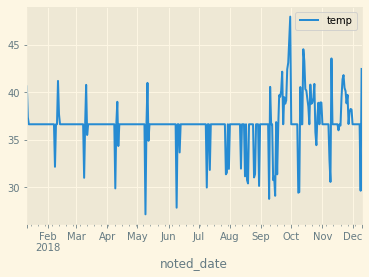

In [54]:
df3.plot()

In [6]:
import matplotlib.dates as mdates
plt.style.use('Solarize_Light2')
from statsmodels.tsa.vector_ar.vecm import coint_johansen
def check_stationary(df,targetparameter,check_stationary_type, differencing):
    if check_stationary_type == 'Rolling_statistics':
        if differencing == 'no':
            w = int(input('Enter Windowing Number:'))
            df['rolling_mean'] = df[targetparameter].rolling(window=w).mean( )
            df['rolling_std'] = df[targetparameter].rolling(window=w).std( )
            return df.index ,df
        elif differencing == 'yes':
            w = int(input(' Enter Windowing Number:'))
            s = int(input(' No.Of.Differencing Required:'))
            df1 = df - df.shift(s)
            df1['rolling_mean'] = df1[targetparameter].rolling(window=w).mean( )
            df1['rolling_std'] = df1[targetparameter].rolling(window=w).std( )
            return df1.index, df1

    elif check_stationary_type == 'ADFTest':
        if differencing == 'no':
            dftest = adfuller(df[targetparameter], autolag='AIC')
            print(dftest)
            Test_stats = dftest[0]
            P_value = dftest[1]
            C_value = dftest[4]
            test = pd.DataFrame([Test_stats, P_value, C_value], columns=[check_stationary_type])
            return df,test

        elif differencing == 'yes':
            s = int(input('No.Of.Differencing Required:'))
            for i in range(s):
                df1 = df[targetparameter] - df[targetparameter].shift(1)
            dftest = adfuller(df1.dropna( ), autolag='AIC')
            Test_stats = dftest[0]
            P_value = dftest[1]
            C_value = dftest[4]
            test = pd.DataFrame([Test_stats, P_value, C_value], columns=[check_stationary_type])
            return df1,test
    
    elif check_stationary_type =='JohansenTest':
        if differencing =='no':
            det_order=int(input('Enter Det_order:')) # must be in -1 to 1 --> (-1,0,1)
            #k_ar_diff =int(input('Enter Number of lagged differences in the model:')) # --> lag values
            data=df[targetparameter]
            joh_model = coint_johansen(data,det_order,0)
            trace_stats = pd.DataFrame([joh_model.lr1],index=["trace_stat"])
            trace_stats=trace_stats.T
            cvt=pd.DataFrame(joh_model.cvt,columns=['conf_interval_90%','conf_interval_95%','conf_interval_99%'])
            return trace_stats,cvt
        elif differencing =='yes':
            det_order=int(input('Enter Det_order:')) # must be in -1 to 1 --> (-1,0,1)
            k_ar_diff =int(input('Enter Number of lagged differences in the model:')) # --> lag values
            data=df[targetparameter]
            joh_model = coint_johansen(data,det_order,k_ar_diff)
            trace_stats = pd.DataFrame([joh_model.lr1],index=["trace_stat"])
            trace_stats=trace_stats.T
            cvt=pd.DataFrame(joh_model.cvt,columns=['conf_interval_90%','conf_interval_95%','conf_interval_99%'])
            return trace_stats,cvt
targetparameter='total_cases'
check_stationary_type='ADFTest' # Rolling_statistics(use windowing) or ADFTest
differencing='yes' # yes or no
df4,output=check_stationary(df1,targetparameter,check_stationary_type,differencing)

No.Of.Differencing Required:1


In [7]:
print(df4)
print(output)

date
2020-05-18        NaN
2020-05-19     6147.0
2020-05-20     5553.0
2020-05-21     6198.0
2020-05-22     6568.0
               ...   
2021-07-02    44111.0
2021-07-03    43071.0
2021-07-04    39796.0
2021-07-05    34703.0
2021-07-06    43733.0
Name: total_cases, Length: 415, dtype: float64
                                             ADFTest
0                                           -3.38228
1                                          0.0115779
2  {'1%': -3.446845912589748, '5%': -2.8688110853...


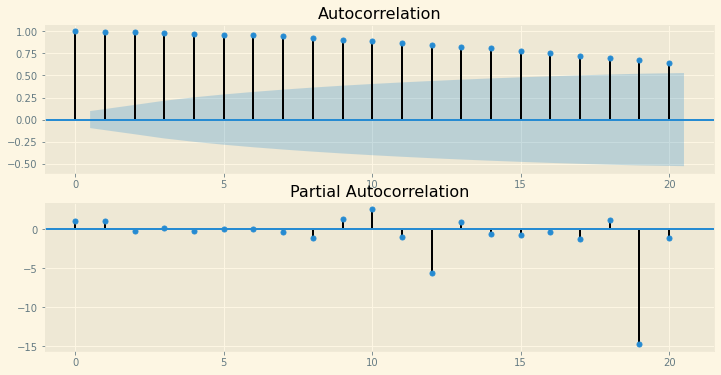

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def acf_pacf_plot(df4):
    df4=df4.dropna()
    fig, ax = plt.subplots(2, figsize=(12,6))
    ax[0] = plot_acf(df4, ax=ax[0], lags=20)
    ax[1] = plot_pacf(df4, ax=ax[1], lags=20)
    return
acf_pacf_plot(df4)

In [41]:
from statsmodels.tsa.arima_model import ARIMA
exogparameter=['Spending','Gain','Loss']
cols = df3.columns
train_size = int(len(df3) * 0.90)
train, test = df3[0:train_size], df3[train_size:len(df3)]
print(train.head())

model = ARIMA(endog=train[targetparameter],exog=train[exogparameter], order=(1, 1, 1))
model_fit = model.fit(disp=False)
#prediction=pd.DataFrame(model_fit.forecast(steps=len(test),exog=test[exogparameter]),columns=test.columns)
#prediction.index=test.index
#future_forecast=model_fit.forecast(steps=15)
#future_forecast=future_forecast.values

#test.plot()
#prediction.plot()

             Money  Spending    Gain    Loss
Date                                        
1995-01-01  3492.4    4851.2  2891.0  1000.0
1995-02-01  3489.9    4850.8  2893.0  1101.0
1995-03-01  3491.1    4885.4  2895.0  1202.0
1995-04-01  3499.2    4890.2     0.0  1303.0
1995-05-01  3524.2    4933.1     0.0  1404.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [46]:
pred=model_fit.forecast(steps=len(test[targetparameter]),exog=test[exogparameter])
#print(pred)
prediction=pd.DataFrame(pred[0],index=test.index,columns=[targetparameter])
test[targetparameter].head()
prediction.head()

,Money
Date,
2013-11-01,11015.525882
2013-12-01,11079.018310
2014-01-01,11139.043369
2014-02-01,11197.097850
2014-03-01,11254.039547


In [39]:
mape=np.mean(np.abs((test.values - prediction.values) / test.values)) * 100
print(mape)
future_forecast=model_fit.forecast(steps=15)
future_forecast=future_forecast.values
print(len(train))
print(len(test))
print(len(prediction))
print(test.head())
print(prediction.head())
print(future_forecast)

32.88172072934924
3285
365
365
            Temp
Date            
1990-01-01  14.8
1990-01-02  13.3
1990-01-03  15.6
1990-01-04  14.5
1990-01-05  14.3
                 Temp
Date                 
1990-01-01  12.125715
1990-01-02  11.798472
1990-01-03  11.650374
1990-01-04  11.567699
1990-01-05  11.561645
[12.12571518 11.7984716  11.6503736  11.56769899 11.56164536 11.6430452
 11.74561409 11.45845402 11.26187643 10.94284825 11.21101089 11.28406428
 11.25429421 11.13117068 11.16757826]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [7]:
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
def timeseries_models(df3,targetparameter,algorithmn,ratio):
    cols = df3.columns
    train_size = int(len(df3) * ratio)
    train, test = df3[0:train_size], df3[train_size:len(df3)]
    #algorithm = input('Enter algorithm to use:')
    if algorithm == 'SimpleExponentialSmoothing':
        model= SimpleExpSmoothing(train[targetparameter])
        model_fit = model.fit(smoothing_level=.5)
        print(model_fit)
        prediction=pd.DataFrame(model_fit.forecast(steps=len(test[targetparameter])),columns=[targetparameter])
        future_forecast=model_fit.forecast(steps=future_period)
        future_forecast=future_forecast.values

    elif algorithm == 'Holtlinear':
        model=Holt(train[targetparameter])
        model_fit=model.fit()
        print(model_fit)
        prediction=pd.DataFrame(model_fit.forecast(steps=len(test[targetparameter])),columns=[targetparameter])
        future_forecast=model_fit.forecast(steps=future_period)
        future_forecast = future_forecast.values

    elif algorithm =='Holtwinter':
        m= int(input('value of seasonal_period:'))
        #When the trend increases or decreases linearly, additive equation is used whereas when the trend increases of decreases exponentially, multiplicative equation is used
        #The additive method is preferred when the seasonal variations are roughly constant through the series,while the multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series.
        model = ExponentialSmoothing(train[targetparameter], trend='add', seasonal='add',seasonal_periods=m)
        model_fit = model.fit()
        prediction = pd.DataFrame(model_fit.forecast(steps=len(test[targetparameter])),columns=[targetparameter])
        print(prediction)
        future_forecast=model_fit.forecast(steps=future_period)
        future_forecast = future_forecast.values
    
    elif algorithm =='ARIMA':
        p = int(input('value of p:'))
        d = int(input('value of d:'))
        q = int(input('value of q:'))
        model = ARIMA(train[targetparameter], order=(p,d,q))
        model_fit = model.fit()
        pred=model_fit.forecast(steps=len(test[targetparameter]))
        prediction=pd.DataFrame(pred[0],index=test.index,columns=[targetparameter])
        future_forecast=model_fit.forecast(steps=future_period)
        #future_forecast=future_forecast.values
    
    elif algorithm =='SARIMA':
        p = int(input('value of p:'))
        d = int(input('value of d:'))
        q = int(input('value of q:'))
        P = int(input('value of p:'))
        D = int(input('value of d:'))
        Q = int(input('value of q:'))
        m= int(input('value of seasonal_period:'))
        model = sm.tsa.statespace.SARIMAX(train[targetparameter], order=(p, d, q),seasonal_order=(P,D,Q,m),enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit()
        pred=model_fit.forecast(steps=len(test[targetparameter]))
        prediction=pd.DataFrame(pred,index=test.index,columns=[targetparameter])
        future_forecast=model_fit.forecast(steps=future_period)
        future_forecast=future_forecast.values
    
    elif algorithm =='ARIMAX':
        p = int(input('value of p:'))
        d = int(input('value of d:'))
        q = int(input('value of q:'))
        model = ARIMA(train[targetparameter],exog=train[exogparameter],order=(p,d,q))
        model_fit = model.fit(disp=False)
        pred=model_fit.forecast(steps=len(test[targetparameter]),exog=test[exogparameter])
        prediction=pd.DataFrame(pred[0],index=test.index,columns=targetparameter)
        future_forecast=model_fit.forecast(steps=future_period)
        future_forecast=future_forecast.values
        
    elif algorithm =='SARIMAX':
        p = int(input('value of p:'))
        d = int(input('value of d:'))
        q = int(input('value of q:'))
        P = int(input('value of p:'))
        D = int(input('value of d:'))
        Q = int(input('value of q:'))
        m= int(input('value of seasonal_period:'))
        model = SARIMAX(train[targetparameter], exog=train[exogparameter],order=(p, d, q),seasonal_order=(P,D,Q,m), enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        pred=model_fit.forecast(steps=len(test[targetparameter]),exog=test[exogparameter])
        prediction=pd.DataFrame(pred,index=test.index,columns=targetparameter)
        print(prediction)
        future_forecast=model_fit.forecast(steps=future_period)
        future_forecast=future_forecast.values

    elif algorithm =='AUTO_ARIMA':
        model = auto_arima(train[targetparameter],start_p=0, d=1, start_q=0, max_p=3, max_d=2, max_q=3,
                           seasonal=False, error_action='warn', trace=True, supress_warning=True,
                           stepwise=True, random_state=20, n_fits=50)
        model.fit(train[targetparameter])
        prediction=pd.DataFrame(model.predict(n_periods=len(test[targetparameter])),index=test.index,columns=[targetparameter])
        future_forecast=model.predict(n_periods=future_period)
        
    elif algorithm =='AUTO_ARIMAX':
        model = auto_arima(train[targetparameter],exogeneous=train[exogparameter],start_p=0, d=1, start_q=0, max_p=3, max_d=2, max_q=3,
                           seasonal=False, error_action='warn', trace=True, supress_warning=True,
                           stepwise=True, random_state=20, n_fits=50)
        model.fit(train[targetparameter],exogeneous=train[exogparameter])
        prediction=pd.DataFrame(model.predict(n_periods=len(test[targetparameter])),index=test.index,columns=targetparameter)
        future_forecast=model.predict(n_periods=future_period)
        
    elif algorithm == 'AUTO_SARIMA':
        model = auto_arima(train[targetparameter],start_p=0, d=0, start_q=0, max_p=2, max_d=1, max_q=2,
                           start_P=0, D=0, start_Q=0, max_P=2, max_D=1, max_Q=2, m=value,
                           seasonal=True, error_action='warn', trace=True, supress_warning=True,
                           stepwise=True, random_state=20, n_fits=50)
        model.fit(train[targetparameter])
        prediction=pd.DataFrame(model.predict(n_periods=len(test[targetparameter])),index=test.index,columns=targetparameter)
        future_forecast=model.predict(n_periods=future_period)
    
    elif algorithm =='AUTO_SARIMAX':
        model=auto_arima(train[targetparameter],exogeneous=train[exogparameter], start_p=0, d=1, start_q=0, max_p=3, max_d=2, max_q=3,
                           start_P=0, D=1, start_Q=0, max_P=3, max_D=2, max_Q=3, m=value,
                           seasonal=True, error_action='warn', trace=True, supress_warning=True,
                           stepwise=True, random_state=20, n_fits=50)
        model.fit(train[targetparameter],exogeneous=train[exogparameter])
        prediction=pd.DataFrame(model.predict(n_periods=len(test[targetparameter])),index=test.index,columns=[targetparameter])
        future_forecast=model.predict(n_periods=future_period)
        
    elif algorithm =='VAR':
        model = VAR(endog=train[targetparameter])
        model_fit = model.fit()
        pred = model_fit.forecast(model_fit.y, steps=len(test[targetparameter]))
        prediction = pd.DataFrame(pred,index=test.index,columns=targetparameter)
        future_forecast=model_fit.forecast(model_fit.y, steps=future_period)
        
    elif algorithm =='VARMA':
        p=int(input('value of p:'))
        q=int(input('value of q:'))
        model = VARMAX(endog=train[targetparameter], order=(p, q))
        model_fit = model.fit()
        prediction = model_fit.forecast(steps=len(test[targetparameter]),index=test.index)
        future_forecast = model_fit.forecast(steps=future_period)
        
    elif algorithm =='VARMAX':
        p=int(input('value of p:'))
        q=int(input('value of q:'))
        model=VARMAX(endog=train[targetparameter],exog=train[exogparameter],order=(p,q))
        model_fit = model.fit()
        prediction=pd.DataFrame(model_fit.predict(steps=len(test[targetparameter]),exog=test[exogparameter],columns=targetparameter))
        future_forecast=model_fit.forecast(steps=future_period)
    

    #for i in cols:
    print('MAE value for', targetparameter, 'is : ', mean_absolute_error(test[targcol],prediction[targcol] ))
    print('RMSE value for', targetparameter, 'is : ', sqrt(mean_squared_error(test[targcol],prediction[targcol])))
    print('MAPE value for', targetparameter, 'is : ',np.mean(np.abs((test[targcol].values - prediction[targcol].values) / test[targcol].values)) * 100)
        
    return train,test,prediction,future_forecast

algorithm ='VARMA'# exgo variable only supports for ARIMAX and SARIMAX models
ratio=0.80
future_period=60
targcol=['open_SAR','volume'] 
train,test,prediction,future_forecast=timeseries_models(df1,targcol,algorithm,ratio)

value of p:1
value of q:1


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


MAE value for ['open_SAR', 'volume'] is :  31028.324731903012
RMSE value for ['open_SAR', 'volume'] is :  44598.34955963704
MAPE value for ['open_SAR', 'volume'] is :  37.426545706738814


In [9]:
mean_absolute_error(test[['open_SAR','volume']],prediction[['open_SAR','volume']])

31028.324731903012

1# from sklearn.metrics import mean_absolute_percentage_error
round(mean_absolute_percentage_error(test, prediction) * 100,2)

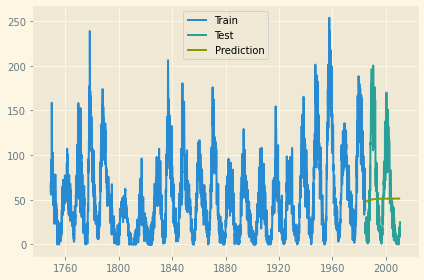

In [12]:
plt.plot(train[targcol], label='Train')
plt.plot(test[targcol], label='Test')
plt.plot(prediction, label='Prediction')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
round(np.mean(np.abs((test[targcol].values - prediction.values) / test[targcol].values)) * 100, 2)

inf

In [52]:
y_true, y_pred= np.array(test[targcol]), np.array(prediction[targcol])
print(y_true , y_pred)

[102.8204 114.7068 113.5958  99.4712  90.3566  93.8095 107.3312 111.9646
 103.3679  93.5772  87.5566  92.7603 101.14   113.0357 109.8601  96.7431
  90.3805  94.3417 105.2722 115.501  106.734  102.9948  91.0092  90.9634
 100.6957 110.148  108.1756  99.2809  91.7871  97.2853 113.4732 124.2549
 112.8811 104.7631  90.2867  92.134  101.878  108.5497 108.194  100.4172
  92.3837  99.7033 109.3477 120.2696 116.3788 104.4706  89.7461  91.093
 102.6495 111.6354 110.5925 101.9204  91.5959  93.0628 103.2203 117.0837
 106.6688  95.3548  89.3254  90.7369 104.0375 114.5397 115.5159 102.7637
  91.4867  92.89   112.7694 114.8505  99.4901 101.0396  88.353   92.0805
 102.1532 112.1538 108.9312  98.6154  93.6137  97.3359 114.7212 129.4048] [102.66880142 109.8349     110.15047528  98.41157687  90.65703496
  93.29026504 110.94577145 116.51754668 107.18088838  99.27143745
  90.09108942  93.02162457 104.12498215 111.29108073 111.60665602
  99.8677576   92.11321569  94.74644577 112.40195218 117.97372742
 108.6

In [43]:
round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

4.35

In [45]:
Error = np.sum(np.abs(np.subtract(test[targcol],prediction[targcol])))
Average = np.sum(test[targcol])
MAPE = Error/Average
print(MAPE)

0.04303369247716026


In [56]:
MAE = mean_absolute_error(test[targcol], prediction[targcol])
print(MAE)

3.2248045356256525


In [57]:
MSE = round(mean_squared_error(test[targcol], prediction[targcol]), 2)
print(MSE)

17.19


In [58]:
RMSE = round(np.sqrt(mean_squared_error(test[targcol], prediction[targcol])), 2)
print(RMSE)

4.15


In [61]:
MAPE = (MAE / np.mean(test[targcol])) * 100
print(round(MAPE,2))

3.14


In [28]:
def futureforecast(test,future_forecast,future_period):
    predict_period = future_period
    if frequencytype=='second':
        future_dates=pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='S')
    if frequencytype == 'minute':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='T')
    elif frequencytype == 'hourly':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='H')
    elif frequencytype == 'daily':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='D')
    elif frequencytype == 'weekly':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq=weekdays(weekday1))
    elif frequencytype == 'monthly':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='M')
    elif frequencytype == 'quarterly':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='Q')
    elif frequencytype == 'yearly':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='Y')
    #print(future_dates)
    final_df = pd.DataFrame()
    final_df[datecol] = future_dates
    final_df.set_index(datecol,inplace=True)
    final_df[targcol] = future_forecast.astype(int)
    return final_df

future_period= 60
final_df=futureforecast(test,future_forecast,future_period)
print(final_df.head())

AttributeError: 'tuple' object has no attribute 'astype'

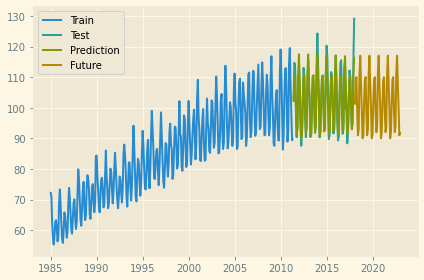

In [11]:
plt.plot(train[targcol], label='Train')
plt.plot(test[targcol], label='Test')
plt.plot(prediction, label='Prediction')
plt.plot(final_df, label='Future')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# for statistical models save & load method using .(PKL) file

In [12]:
train_size = int(len(df3) * 0.90)
train, test = df3[0:train_size], df3[train_size:len(df3)]
print(test.tail())

            IPG2211A2N
DATE                  
2016-08-01    115.5159
2016-09-01    102.7637
2016-10-01     91.4867
2016-11-01     92.8900
2016-12-01    112.7694


In [13]:
model=ExponentialSmoothing(train, trend='add', seasonal='add',seasonal_periods=12)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [14]:
model_fit=model.fit()

In [15]:
model_fit.save('model.pkl')  # model summary

In [16]:
import pickle
with open('model.pkl', 'rb') as f:
    data=pickle.load(f)
print(data)

In [17]:
prediction= pd.DataFrame(data.forecast(steps=len(test)),index=test.index,columns=test.columns)
prediction.head()

,IPG2211A2N
DATE,
2013-10-01,90.237300
2013-11-01,93.443007
2013-12-01,108.504182
2014-01-01,115.955765
2014-02-01,107.031176


In [ ]:
# for auto arima models save and load method will change slightly 

In [18]:
model = auto_arima(train,start_p=0, d=1, start_q=0, max_p=3, max_d=2, max_q=3,
                           seasonal=False, error_action='warn', trace=True, supress_warning=True,
                           stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=2356.626, BIC=2364.307, Time=0.095 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=2306.489, BIC=2318.011, Time=0.465 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=2243.855, BIC=2255.377, Time=0.475 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=2354.664, BIC=2358.505, Time=0.084 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=2245.211, BIC=2260.574, Time=0.697 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=2152.225, BIC=2167.588, Time=0.841 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=2125.256, BIC=2144.459, Time=1.634 seconds
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=1796.671, BIC=1819.714, Time=3.055 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA(1,1,3)x(0,0,0,0) [intercept=True]; AIC=2089.684, BIC

In [19]:
#Serialize with Pickle
import pickle
with open('model.pkl', 'wb') as pkl:
    pickle.dump(model, pkl)

In [20]:
#Now read it back and make a prediction
with open('model.pkl', 'rb') as pkl:
    pickle_preds = pd.DataFrame(pickle.load(pkl).predict(n_periods=len(test)),index=test.index,columns=test.columns)

In [21]:
print(pickle_preds.head())

            IPG2211A2N
DATE                  
2013-10-01   90.974766
2013-11-01   95.437030
2013-12-01  108.303228
2014-01-01  116.804996
2014-02-01  112.546504
